# Required Imports and Constants

In [1]:
%matplotlib inline

import ast
import json
import os
import sys

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")


AYS_PIDS = [
      "0Odg8Ya9cQZM",
      "3Bl1l9qPo03v",
      "9BJDMrSg5GU2",
      "AtYKOM9xQoxo",
      "bvxCS2xslVD1",
      "bzdxtTFRW7bn",
      "Ck5zEa9jS8kr",
      "EPcW0vyMy901",
      "gzgUnyhhYvag",
      "kK7uC15Oxl7j",
      "WAiLZBXejqs6",
      "WBoN8OgUq9kM",
      "xrQxT9kE7trL",
]

SUM_PIDS = [
      "7YPaDt3k6zUJ",
      "9oAsM1Zsd2ZL",
      "BDsZoXY2KvCq",
      "cBx0ECEdnCXE",
      "DMMPwdh9JyIJ",
      "F8aaNjmqipm9",
      "iLi4QFTFUW6W",
      "KB4R9vQpgvDE",
      "n8dCqYoZqOtZ",
      "oa0dujnJJIQK",
      "Q3GODcr8rSU2",
      "Xb1da3tmq51s",
      "XK6R4nlN8DL9",
      "Xm4gLrMYjXLp",
]

RT_PIDS = [
      "3jCj03ExwbiR",
      "3LjPd26Bv20B",
      "7zspHOjpyZg6",
      "qBEgmP5F3go8",
      "RJozqLvmzUql",
      "SM3fpzR19vuY",
      "tqnTUO7mgIPw",
      "VSG8tghjg06Z",
      "wYKNw3brGUCM",
      "yJrWi90sw5Fv",
      "ZDOTBhGZ9oS9",
]

RTSUM_PIDS = [
      "1V7m8wY9JNak",
      "606gnDVdNwnt",
      "7UfOha66klmh",
      "DAn39rXtnCAS",
      "ggYz115dy0a9",
      "joO2OX6p9rr6",
      "rJwpqBcwhEar",
      "UPGk3s3Qldql",
      "vEiIrVSiezFn",
      "w6ptnTrqQi3D",
      "wJm4COpLVvz5",
      "zV0yHZRI3MH9"
]

ALL_PIDS = {
    'CTRL': AYS_PIDS,
    'SUM': SUM_PIDS,
    'RT': RT_PIDS,
    'RTSUM': RTSUM_PIDS,
}

# 6.4 Behavior - Interactions - Hover, Encode, Filter, Click Interactions by Task and Condition

Gathering data
--------------
CTRL ...
SUM ...
RT ...
RTSUM ...


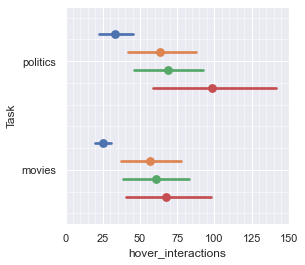

<Figure size 432x288 with 0 Axes>

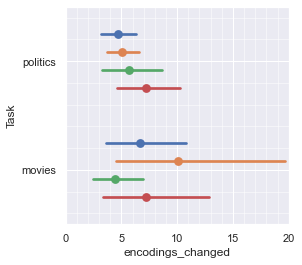

<Figure size 432x288 with 0 Axes>

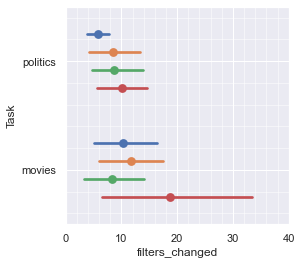

<Figure size 432x288 with 0 Axes>

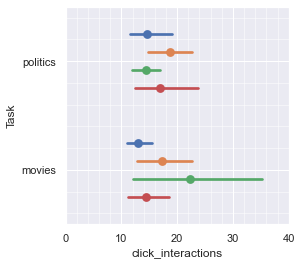

<Figure size 432x288 with 0 Axes>

In [2]:
# Set constants

hover_interactions = ["mouseover", "mouseover_from_list"]
encode_interactions = ["axes_attribute_changed"]
filter_interactions = ["filter_changed"]
click_interactions = [
    "add_to_list_via_scatterplot_click", 
    "add_to_list_via_card_click", 
    "remove_from_list_via_list_item_click", 
    "remove_from_list_via_card_click"
]


# collect rows

rows = []
print("Gathering data\n--------------")
for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
    print(f"{condition} ...")
    PIDS = ALL_PIDS[condition]
    for pid in PIDS:
        basepath = os.path.join(condition, pid)  # basepath for PID
        df = pd.read_csv(os.path.join(basepath, f"interaction.csv"))
        for task in ['politics', 'movies']:
            df_task = df[df['appMode'] == task]
            hovers = len(df_task[df_task['interactionType'].isin(hover_interactions)].reset_index(drop=True).index)
            encodes = len(df_task[df_task['interactionType'].isin(encode_interactions)].reset_index(drop=True).index)
            filters = len(df_task[df_task['interactionType'].isin(filter_interactions)].reset_index(drop=True).index)
            clicks = len(df_task[df_task['interactionType'].isin(click_interactions)].reset_index(drop=True).index)
            rows.append([pid, condition, task, hovers, encodes, filters, clicks])


# plot rows

df_interactions = pd.DataFrame(
    rows,
    columns=['PID', 'Condition', 'Task', 'hover_interactions', 'encodings_changed', 'filters_changed', 'click_interactions']
)

x_lims = {
    'hover_interactions': [0, 150], 
    'encodings_changed': [0, 20], 
    'filters_changed': [0, 40], 
    'click_interactions': [0, 40]
}

for key, value in x_lims.items():
    
    fig, ax = plt.subplots(figsize=(4,4))

    sns.pointplot(ax=ax, x=key, y="Task", hue="Condition", data=df_interactions, join=False, dodge=.5)
    ax.set_xlim(value)
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)

    # save legend to file
    legendfig = plt.figure()
    legendfig.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1])
    legendfig.savefig(f'charts/revised_analysis_06-2021/conditions_legend.png', dpi=300, bbox_inches='tight')

    # remove legends from plots
    ax.get_legend().remove()

    # save figure
    # plt.show()
    fig.savefig(f'charts/revised_analysis_06-2021/{key}.png', dpi=300, bbox_inches='tight')

# 6.4 Behavior - Bias Metrics - AD Metric for Select Attributes By Condition

Gathering data
--------------
politics
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...
movies
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...


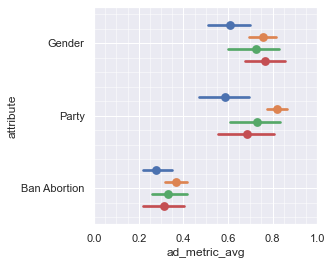

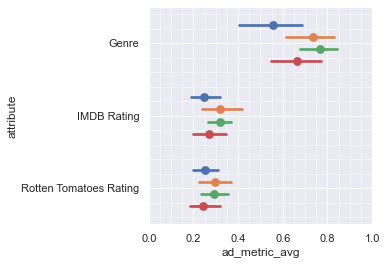

In [3]:
metric = "ad_metric_avg"
attrs = {
    'politics': ['gender', 'party', 'policy_strength_ban_abortion_after_6_weeks'],
    'movies': ['IMDB Rating', 'Genre', 'Rotten Tomatoes Rating'],
}

print("Gathering data\n--------------")
for task in ['politics', 'movies']:
    dfs = []
    print(task)
    for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
        print(f"  {condition} ...")
        PIDS = ALL_PIDS[condition]
        for pid in PIDS:
            basepath = os.path.join(condition, pid)  # basepath for PID
            df = pd.read_csv(os.path.join(basepath, f"attr_stats_{task}.csv"))
            dfs.append(
                df.assign(PID=lambda x: pid)
                    .assign(Condition=lambda x: condition)[['PID', 'Condition', 'attribute', metric]]
            )


    # Combine into single DataFrame
    df_metric = pd.concat(dfs, ignore_index=True)
    df_metric = df_metric[df_metric['attribute'].isin(attrs[task])]


    ### PLOT ###

    labels = ['RTSUM', 'RT', 'SUM', 'CTRL']
    plot_titles = {
        'politics': {
            'age': 'Age',
            'gender': 'Gender',
            'occupation': 'Occupation',
            'party': 'Party',
            'political_experience': 'Experience',
            'policy_strength_ban_abortion_after_6_weeks': 'Ban Abortion',
            'policy_strength_legalize_medical_marijuana': 'Legalize Medical Marijuana',
            'policy_strength_increase_medicare_funding': 'Increase Medicare Funding',
            'policy_strength_ban_alcohol_sales_sundays': 'Ban Alcohol on Sundays'
        },
        'movies': {
            "Running Time": "Running Time",
            "Production Budget": "Production Budget",
            "Worldwide Gross": "Worldwide Gross",
            "Rotten Tomatoes Rating": "Rotten Tomatoes Rating",
            "IMDB Rating": "IMDB Rating",
            "Genre": "Genre",
            "Creative Type": "Creative Type",
            "Content Rating": "Content Rating",
            "Release Year": "Release Year",
        }
    }
    
    df_metric = df_metric.replace({'attribute': plot_titles[task]})

    fig, ax = plt.subplots(figsize=(4,4))
    
    sns.pointplot(ax=ax, x=metric, y="attribute", hue="Condition", data=df_metric, join=False, dodge=.5)
    ax.set_xlim([0, 1])
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)
    ax.get_legend().remove()
    
    # plt.show()
    plt.savefig(f'charts/revised_analysis_06-2021/ad_metric_{task}_condition.png', dpi=300, bbox_inches='tight')


# 6.4 Behavior - Bias Metrics - DPD Metric by Task and Condition

Gathering data
--------------
politics
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...
movies
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...


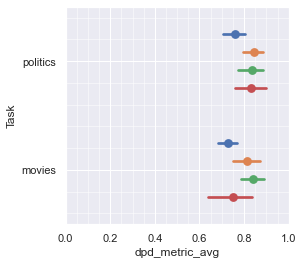

In [4]:
# set constants

metric = "dpd_metric_avg"


# collect dataframes

dfs = []
print("Gathering data\n--------------")
for task in ['politics', 'movies']:
    print(task)
    for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
        PIDS = ALL_PIDS[condition]
        print(f"  {condition} ...")
        for pid in PIDS:
            basepath = os.path.join(condition, pid)  # basepath for PID
            df = pd.read_csv(os.path.join(basepath, f"attr_stats_{task}.csv"))
            dfs.append(
                df.assign(PID=lambda x: pid)
                    .assign(Condition=lambda x: condition)
                    .assign(Task=lambda x: task)[['PID', 'Condition', 'Task', 'attribute', metric]]
            )


# plot

df_metric = pd.concat(dfs, ignore_index=True)
dpd_metric = (df_metric.groupby(['PID', 'Condition', 'Task'])[metric]
    .apply(list)
    .map(lambda x: x[0])
    .reset_index()
    .sort_values(by=['Task'], key=lambda x: x.map({'politics': 0, 'movies': 1}))
    .sort_values(by=['Condition'], key=lambda x: x.map({'CTRL': 0, 'SUM': 1, 'RT': 2, 'RTSUM': 3}))
)

fig, ax = plt.subplots(figsize=(4,4))

sns.pointplot(ax=ax, x=metric, y="Task", hue="Condition", data=dpd_metric, join=False, dodge=.5)
ax.set_xlim([0, 1])
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
ax.get_legend().remove()

# plt.show()
plt.savefig(f'charts/revised_analysis_06-2021/dpd_metric_condition.png', dpi=300, bbox_inches='tight')

# 6.4 Behavior - Revisions - # of Initial Selections Revised by Task and Condition

Gathering data
--------------
politics
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...
movies
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...


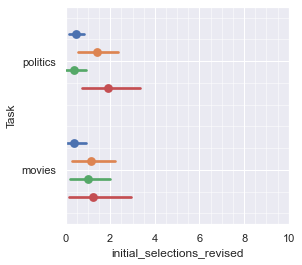

In [5]:
# set constants

row_index = {
    'politics': 1,
    'movies': 0,
}


# collect rows

rows = []
print("Gathering data\n--------------")
for task in ['politics', 'movies']:
    print(task)
    for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
        PIDS = ALL_PIDS[condition]
        print(f"  {condition} ...")
        for pid in PIDS:
            basepath = os.path.join(condition, pid)  # basepath for PID
            try:
                df = pd.read_csv(os.path.join(basepath, f"task_PM.csv"))
                appOrder = "PM"
            except FileNotFoundError:
                df = pd.read_csv(os.path.join(basepath, f"task_MP.csv"))
                appOrder = "MP"

            drop_cols = [
                'selected',
                'timesVisited',
                'sizeVar',
                'xVar',
                'yVar',
                'jitter_x',
                'jitter_y',
            ]

            ### Get Ratio Of by Phase ###

            # Phase 1
            selection_phase_1 = (
                df[df['task'] == task]['selection_phase_1'].map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series).T[row_index[task]]
                    .map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series)
                    .drop(columns=drop_cols)
                    .reset_index(drop=True)
            )

            # Phase 2
            selection_phase_2 = (
                df[df['task'] == task]['selection_phase_2'].map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series).T[row_index[task]]
                    .map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series)
                    .drop(columns=drop_cols)
                    .reset_index(drop=True)
            )

            # get ratio
            nchanged = 10 - len(set(selection_phase_1['id']) & set(selection_phase_2['id']))
            rows.append([pid, condition, task, nchanged])


# plot

df_nchanged = pd.DataFrame(
    rows,
    columns=['PID', 'Condition', 'Task', 'initial_selections_revised']
)

fig, ax = plt.subplots(figsize=(4,4))

sns.pointplot(ax=ax, x='initial_selections_revised', y="Task", hue="Condition", data=df_nchanged, join=False, dodge=.5)
ax.set_xlim([0, 10])
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
ax.get_legend().remove()

# plt.show()
plt.savefig(f'charts/revised_analysis_06-2021/initial_selections_revised.png', dpi=300, bbox_inches='tight')

# 6.4 Behavior - Revisions - # of Interactions After Initial Submission by Task and Condition

Gathering data
--------------
politics
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...
movies
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...


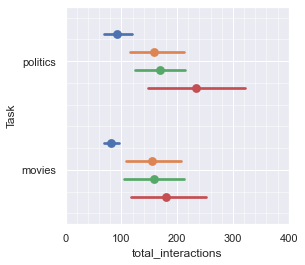

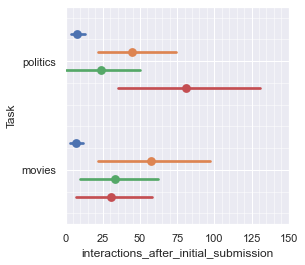

In [6]:
# constants
task = "movies"


# gather rows

rows = []
print("Gathering data\n--------------")
for task in ['politics', 'movies']:
    print(task)
    for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
        PIDS = ALL_PIDS[condition]
        print(f"  {condition} ...")
        for pid in PIDS:
            basepath = os.path.join(condition, pid)  # basepath for PID
            df = pd.read_csv(os.path.join(basepath, f"interaction.csv"))
            df_task = df[df['appMode'] == task].reset_index(drop=True)
            
            interactions = len(df_task.index)

            idx1 = df_task[df_task['interactionType'] == 'click_submit_button_revise'].index.tolist()[0]
            idx2 = df_task[df_task['interactionType'] == 'click_submit_button_final'].index.tolist()[0]
            nrevisions = len(df_task.iloc[idx1+1:idx2].index)

            rows.append([pid, condition, task, interactions, nrevisions])


# plot

df_nchanged = pd.DataFrame(
    rows,
    columns=['PID', 'Condition', 'Task', 'total_interactions', 'interactions_after_initial_submission']
)

fig, ax = plt.subplots(figsize=(4,4))

sns.pointplot(ax=ax, x='total_interactions', y="Task", hue="Condition", data=df_nchanged, join=False, dodge=.5)
ax.set_xlim([0, 400])
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
ax.get_legend().remove()

# plt.show()
plt.savefig(f'charts/revised_analysis_06-2021/total_interactions.png', dpi=300, bbox_inches='tight')


fig, ax = plt.subplots(figsize=(4,4))

sns.pointplot(ax=ax, x='interactions_after_initial_submission', y="Task", hue="Condition", data=df_nchanged, join=False, dodge=.5)
ax.set_xlim([0, 150])
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
ax.get_legend().remove()

# plt.show()
plt.savefig(f'charts/revised_analysis_06-2021/interactions_after_initial_submission.png', dpi=300, bbox_inches='tight')

# 6.5 Decisions - Ratio of Candidate Types Selected in Each Phase by Condition

Gathering data
--------------
party, Democrat ratios
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...
gender, Male ratios
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...


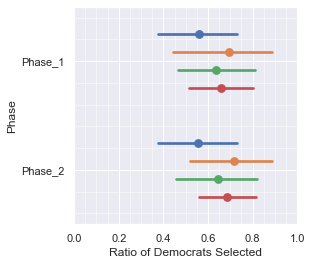

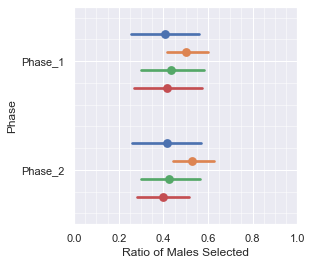

In [7]:
task = "politics"
choices = {
    'politics': {
        'gender': ['Male', 'Female'],
        'party': ['Republican', 'Democrat'],
    }
}

print("Gathering data\n--------------")
for attribute, ratio_of in [('party', 'Democrat'), ('gender', 'Male')]:
    rows = []
    print(f'{attribute}, {ratio_of} ratios')
    choices_zeros = pd.Series(
        [0.0 for _ in range(len(choices[task][attribute]))], 
        index=choices[task][attribute], 
        name=attribute
    )
    for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
        print(f'  {condition} ...')
        PIDS = ALL_PIDS[condition]
        for pid in PIDS:
            basepath = os.path.join(condition, pid)  # basepath for PID
            try:
                df = pd.read_csv(os.path.join(basepath, f"task_PM.csv"))
                appOrder = "PM"
            except FileNotFoundError:
                df = pd.read_csv(os.path.join(basepath, f"task_MP.csv"))
                appOrder = "MP"

            drop_cols = [
                'selected',
                'timesVisited',
                'sizeVar',
                'xVar',
                'yVar',
                'jitter_x',
                'jitter_y',
            ]

            ### Get Ratio Of by Phase ###

            # Phase 1
            selection_phase_1 = (
                df[df['task'] == task]['selection_phase_1'].map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series).T[1]
                    .map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series)
                    .drop(columns=drop_cols)
                    .reset_index(drop=True)
            )
            attr_counts_phase_1 = (
                selection_phase_1[attribute].value_counts(normalize=True)
                    .append(choices_zeros)
                    .reset_index()
                    .drop_duplicates(subset='index', keep='first')
                    .set_index('index')[attribute]
            )

            # Phase 2
            selection_phase_2 = (
                df[df['task'] == task]['selection_phase_2'].map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series).T[1]
                    .map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series)
                    .drop(columns=drop_cols)
                    .reset_index(drop=True)
            )
            attr_counts_phase_2 = (
                selection_phase_2[attribute].value_counts(normalize=True)
                    .append(choices_zeros)
                    .reset_index()
                    .drop_duplicates(subset='index', keep='first')
                    .set_index('index')[attribute]
            )

            # Add to list of rows to create DataFrame from
            rows.append([pid, condition, attr_counts_phase_1.loc[ratio_of], attr_counts_phase_2.loc[ratio_of]])

    # Combine phase 1 and 2 into single dataframe
    df_ratio_of_by_phase = pd.melt(
        pd.DataFrame(rows, columns=['PID', 'Condition', 'Phase_1', 'Phase_2']),
        id_vars = ['PID', 'Condition'],
        value_vars = ['Phase_1', 'Phase_2'],
        var_name = 'Phase',
        value_name = f'Ratio of {ratio_of}s Selected'
    )
    
    fig, ax = plt.subplots(figsize=(4,4))
    
    sns.pointplot(ax=ax, x=f'Ratio of {ratio_of}s Selected', y='Phase', hue='Condition', 
                  data=df_ratio_of_by_phase, join=False, dodge=.5)
    ax.set_xlim([0, 1])
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)
    ax.get_legend().remove()
    
    # plt.show()
    plt.savefig(f'charts/revised_analysis_06-2021/{attribute}_ratio_{ratio_of}_selected.png', dpi=300, bbox_inches='tight')

# 6.6 Awareness - AD Metric for Select Attributes By Focus and Surprise 

Gathering data
--------------
politics
  focus ...
  surprise ...
movies
  focus ...
  surprise ...


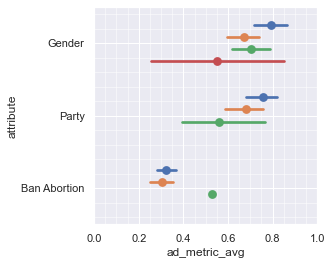

<Figure size 432x288 with 0 Axes>

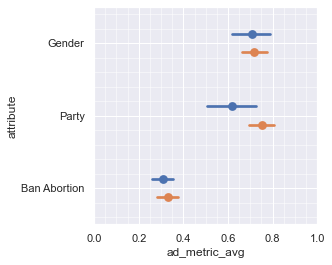

<Figure size 432x288 with 0 Axes>

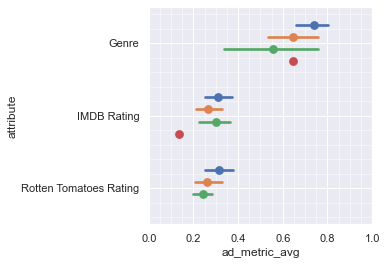

<Figure size 432x288 with 0 Axes>

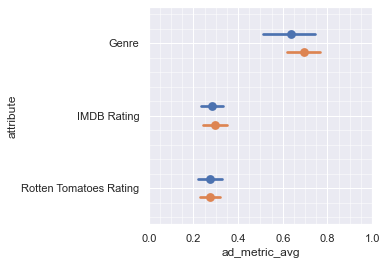

<Figure size 432x288 with 0 Axes>

In [8]:
# constant

metric = "ad_metric_avg"
attrs = {
    'politics': ['gender', 'party', 'policy_strength_ban_abortion_after_6_weeks'],
    'movies': ['IMDB Rating', 'Genre', 'Rotten Tomatoes Rating'],
}
row_index = {
    'politics': 1,
    'movies': 0,
}


# collect rows

print("Gathering data\n--------------")
for task in ['politics', 'movies']:
    print(task)
    for measure in ['focus', 'surprise']:
        sf_dfs = []
        ad_dfs = []
        print(f"  {measure} ...")
        for condition in ['CTRL', 'SUM', 'RT', 'RTSUM']:
            PIDS = ALL_PIDS[condition]

            ### SURPRISE/FOCUS ###

            for pid in PIDS:
                # get file
                basepath = os.path.join(condition, pid)  # basepath for PID
                try:
                    df = pd.read_csv(os.path.join(basepath, f"task_PM.csv"))
                    appOrder = "PM"
                except FileNotFoundError:
                    df = pd.read_csv(os.path.join(basepath, f"task_MP.csv"))
                    appOrder = "MP"

                # user 'rJwpqBcwhEar' RTSUM MP missing movies surprise/focus, skip them
                if not (pid == 'rJwpqBcwhEar' and task == 'movies'):

                    # append surprise/focus counts
                    sf_dfs.append(
                        df[df['task'] == task]['surprise_focus'].map(lambda x: ast.literal_eval(str(x)))
                            .apply(pd.Series).T[row_index[task]]
                            .map(lambda x: ast.literal_eval(str(x)))
                            .apply(pd.Series)
                            .reset_index()
                            .rename(columns={'index': 'attribute'})
                            .assign(PID=lambda x: pid)[['PID', 'attribute', 'focus', 'surprise']]
                    )

                    ad_dfs.append(
                        pd.read_csv(os.path.join(basepath, f"attr_stats_{task}.csv"))
                            .assign(PID=lambda x: pid)[['PID', 'attribute', 'ad_metric_final', 'ad_metric_avg']]
                    )

        # push the dataframes together and join on ['PID', 'attribute']
        surprise_focus = pd.concat(sf_dfs, ignore_index=True)
        ad_metric = pd.concat(ad_dfs, ignore_index=True)
        df_measures = (
            surprise_focus.set_index(['PID', 'attribute']).join(ad_metric.set_index(['PID', 'attribute'])).reset_index()
        )

        df_measures = df_measures[df_measures['attribute'].isin(attrs[task])]

        ### PLOT ###

        plot_titles = {
            'politics': {
                'age': 'Age',
                'gender': 'Gender',
                'occupation': 'Occupation',
                'party': 'Party',
                'political_experience': 'Experience',
                'policy_strength_ban_abortion_after_6_weeks': 'Ban Abortion',
                'policy_strength_legalize_medical_marijuana': 'Legalize Medical Marijuana',
                'policy_strength_increase_medicare_funding': 'Increase Medicare Funding',
                'policy_strength_ban_alcohol_sales_sundays': 'Ban Alcohol on Sundays'
            },
            'movies': {
                "Running Time": "Running Time",
                "Production Budget": "Production Budget",
                "Worldwide Gross": "Worldwide Gross",
                "Rotten Tomatoes Rating": "Rotten Tomatoes Rating",
                "IMDB Rating": "IMDB Rating",
                "Genre": "Genre",
                "Creative Type": "Creative Type",
                "Content Rating": "Content Rating",
                "Release Year": "Release Year",
            }
        }

        if measure == 'focus':
            dodge = .5
            df_measures = (df_measures.replace({'attribute': plot_titles[task]})
                .sort_values(by=['focus'], key=lambda x: x.map({'high': 0, 'medium': 1, 'low': 2, 'na': 3}))
            )
        else:
            dodge = .25
            df_measures = (df_measures.replace({'attribute': plot_titles[task]})
                .sort_values(by=['surprise'], key=lambda x: x.map({'yes': 0, 'no': 1}))
            )
            
        if task == 'politics':
            order = ['Gender', 'Party', 'Ban Abortion']
        else:
            order = ['Genre', 'IMDB Rating', 'Rotten Tomatoes Rating']

        fig, ax = plt.subplots(figsize=(4,4))

        sns.pointplot(ax=ax, x=metric, y="attribute", hue=measure, order=order, 
                      data=df_measures, join=False, dodge=dodge)
        ax.set_xlim([0, 1])
        ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.grid(b=True, which='major', color='w', linewidth=1.0)
        ax.grid(b=True, which='minor', color='w', linewidth=0.5)
        
        # save legend to file
        legendfig = plt.figure()
        legendfig.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1])
        legendfig.savefig(f'charts/revised_analysis_06-2021/{measure}_legend.png', dpi=300, bbox_inches='tight')
        
        # remove legend
        ax.get_legend().remove()

#         plt.show()
        fig.savefig(f'charts/revised_analysis_06-2021/ad_metric_{task}_{measure}.png', dpi=300, bbox_inches='tight')
        

# 6.6 Awareness - Total Count of Surprise Responses by Corresponding Focus Response for Each Condition and Task

Gathering data
--------------
politics
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...
movies
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...


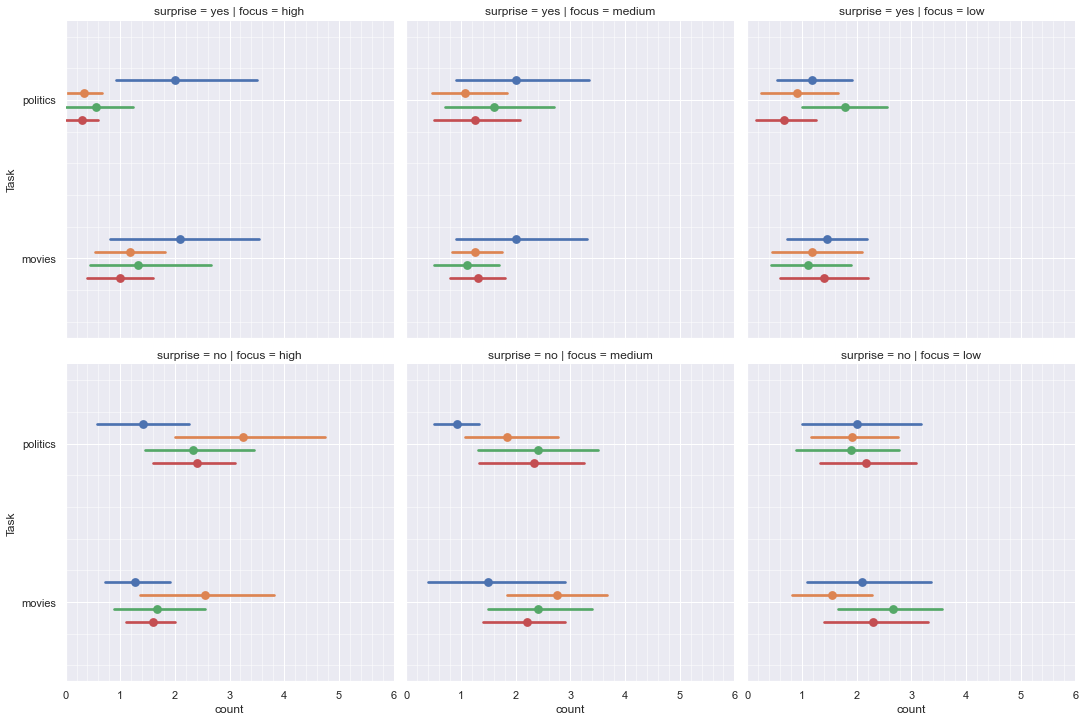

In [9]:
# set constants

row_index = {
    'politics': 1,
    'movies': 0,
}

# collect dataframes

dfs = []
print("Gathering data\n--------------")
for task in ['politics', 'movies']:
    print(task)
    for condition in ['CTRL', 'SUM', 'RT', 'RTSUM']:
        PIDS = ALL_PIDS[condition]
        print(f'  {condition} ...')
        for pid in PIDS:
            # get file
            basepath = os.path.join(condition, pid)  # basepath for PID
            try:
                df = pd.read_csv(os.path.join(basepath, f"task_PM.csv"))
                appOrder = "PM"
            except FileNotFoundError:
                df = pd.read_csv(os.path.join(basepath, f"task_MP.csv"))
                appOrder = "MP"

            # user 'rJwpqBcwhEar' RTSUM MP missing movies surprise/focus, skip them
            if not (pid == 'rJwpqBcwhEar' and task == 'movies'):

                # append surprise/focus counts
                dfs.append(
                    df[df['task'] == task]['surprise_focus'].map(lambda x: ast.literal_eval(str(x)))
                        .apply(pd.Series).T[row_index[task]]
                        .map(lambda x: ast.literal_eval(str(x)))
                        .apply(pd.Series)
                        .reset_index()
                        .rename(columns={'index': 'attribute'})
                        .assign(PID=lambda x: pid)
                        .assign(Condition=lambda x: condition)
                        .assign(Task=lambda x: task)[['PID', 'Condition', 'Task', 'attribute', 'focus', 'surprise']]
                )

# plot

df_counts = pd.melt(
    (
        pd.concat(dfs, ignore_index=True)
            .groupby(['PID', 'Condition', 'Task', 'focus', 'surprise'])
            .size()
            .unstack(fill_value=0)
            .reset_index()
    ), 
    id_vars=['PID', 'Condition', 'Task', 'focus'], 
    value_vars=['yes', 'no'], 
    value_name='count'
)

df_counts = df_counts[~df_counts['focus'].isin(['na'])]


g = sns.catplot(x="count", y="Task", hue="Condition", col="focus", row="surprise", data=df_counts,
                order=['politics', 'movies'], hue_order=['CTRL', 'SUM', 'RT', 'RTSUM'], 
                row_order=['yes', 'no'], col_order=['high', 'medium', 'low'], 
                kind='point', join=False, dodge=.25, legend=False)

for row_axes in g.axes:
    for ax in row_axes:
        ax.set_xlim([0, 6])
        ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.grid(b=True, which='major', color='w', linewidth=1.0)
        ax.grid(b=True, which='minor', color='w', linewidth=0.5)

g.savefig(f'charts/revised_analysis_06-2021/surprise_focus.png', dpi=300, bbox_inches='tight')

# 6.6 Awareness - Distribution of Focus by Attribute and Task

Gathering data
--------------
politics
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...
movies
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...


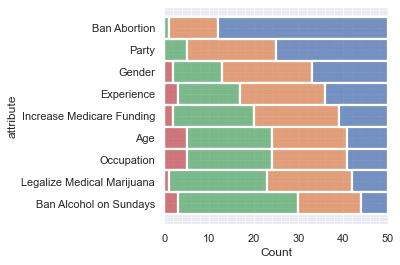

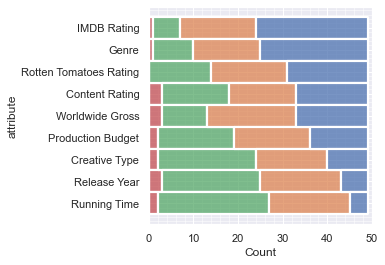

In [10]:
row_index = {
    'politics': 1,
    'movies': 0,
}

print("Gathering data\n--------------")
for task in ['politics', 'movies']:
    dfs = []
    print(task)
    for condition in ['CTRL', 'SUM', 'RT', 'RTSUM']:
        PIDS = ALL_PIDS[condition]
        print(f'  {condition} ...')
        for pid in PIDS:
            # get file
            basepath = os.path.join(condition, pid)  # basepath for PID
            try:
                df = pd.read_csv(os.path.join(basepath, f"task_PM.csv"))
                appOrder = "PM"
            except FileNotFoundError:
                df = pd.read_csv(os.path.join(basepath, f"task_MP.csv"))
                appOrder = "MP"

            # user 'rJwpqBcwhEar' RTSUM MP missing movies surprise/focus, skip them
            if not (pid == 'rJwpqBcwhEar' and task == 'movies'):

                # append surprise/focus counts
                dfs.append(
                    df[df['task'] == task]['surprise_focus'].map(lambda x: ast.literal_eval(str(x)))
                        .apply(pd.Series).T[row_index[task]]
                        .map(lambda x: ast.literal_eval(str(x)))
                        .apply(pd.Series)
                        .reset_index()
                        .rename(columns={'index': 'attribute'})
                        .assign(PID=lambda x: pid)[['PID', 'attribute', 'focus', 'surprise']]
                )
    
    # create dataframes
                
    plot_titles = {
        'politics': {
            'age': 'Age',
            'gender': 'Gender',
            'occupation': 'Occupation',
            'party': 'Party',
            'political_experience': 'Experience',
            'policy_strength_ban_abortion_after_6_weeks': 'Ban Abortion',
            'policy_strength_legalize_medical_marijuana': 'Legalize Medical Marijuana',
            'policy_strength_increase_medicare_funding': 'Increase Medicare Funding',
            'policy_strength_ban_alcohol_sales_sundays': 'Ban Alcohol on Sundays'
        },
        'movies': {
            "Running Time": "Running Time",
            "Production Budget": "Production Budget",
            "Worldwide Gross": "Worldwide Gross",
            "Rotten Tomatoes Rating": "Rotten Tomatoes Rating",
            "IMDB Rating": "IMDB Rating",
            "Genre": "Genre",
            "Creative Type": "Creative Type",
            "Content Rating": "Content Rating",
            "Release Year": "Release Year",
        }
    }

    surprise_focus = pd.concat(dfs, ignore_index=True)
    df_counts = (
        surprise_focus.groupby(['attribute', 'focus'])
            .size()
            .unstack(fill_value=0)[['high', 'medium', 'low', 'na']].T
            .reset_index()
            .melt(id_vars=['focus'], value_vars=list(plot_titles[task].keys()))
            .replace({'attribute': plot_titles[task]})
            .sort_values(by=['value'], ascending=False)
            .sort_values(by=['focus', 'value'], key=lambda x: x.map({'high': 0, 'medium': 1, 'low': 2, 'na': 3}))
    )
    
    
    fig, ax = plt.subplots(figsize=(4,4))

    sns.histplot(ax=ax, y="attribute", hue='focus', weights='value', multiple='stack', data=df_counts)
    ax.set_xlim([0, 50])
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)

    # remove legend
    ax.get_legend().remove()

#     plt.show()
    fig.savefig(f'charts/revised_analysis_06-2021/{task}_total_focus_counts.png', dpi=300, bbox_inches='tight')

# 6.7 Usability - Average Number of Interactions with Distribution Chart 

Gathering data
--------------
politics
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...

  Condition  count_dist_card_click
0      CTRL               0.000000
1        RT               2.090909
2     RTSUM               1.333333
3       SUM               0.000000

[[0. 0.]
 [0. 0.]]
[[0.33333333 1.        ]
 [2.5        1.        ]]
[[0.725      2.        ]
 [3.72727273 2.        ]]
[[0. 3.]
 [0. 3.]]

movies
  CTRL ...
  SUM ...
  RT ...
  RTSUM ...

  Condition  count_dist_card_click
0      CTRL               0.000000
1        RT               3.181818
2     RTSUM               2.083333
3       SUM               0.000000

[[0. 0.]
 [0. 0.]]
[[0.08333333 1.        ]
 [4.41666667 1.        ]]
[[0.45454545 2.        ]
 [6.63636364 2.        ]]
[[0. 3.]
 [0. 3.]]



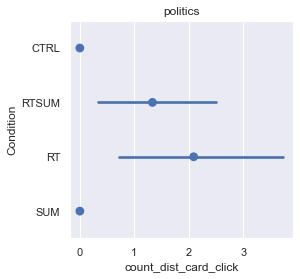

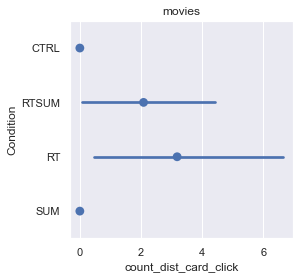

In [11]:
# set constants

tasks = ['politics', 'movies']
conditions = ["CTRL", "SUM", "RT", "RTSUM"]

# collect dataframes

print("Gathering data\n--------------")
for task in tasks:
    dfs = []
    print(task)
    for condition in conditions:
        print(f'  {condition} ...')
        dfs.append(
            pd.read_csv(f"{condition}/all_{condition}_{task}_attr_stats.csv", sep=",")
                .assign(Condition = lambda x: condition)
        )

    # plot

    stats = pd.concat(dfs).reset_index().drop(columns=['index'])

    df_count_dist_card_clicks = stats.groupby(['pid', 'Condition'])['count_dist_card_click'].sum().reset_index()

    print()
    print(df_count_dist_card_clicks.groupby('Condition')['count_dist_card_click'].mean().reset_index())

    fig, ax = plt.subplots(figsize=(4,4))

    sns.pointplot(ax=ax, x='count_dist_card_click', y='Condition', 
                  data=df_count_dist_card_clicks, join=False, dodge=.5).set_title(f'{task}')

    print()
    print(ax.get_lines()[0].get_xydata())
    print(ax.get_lines()[1].get_xydata())
    print(ax.get_lines()[2].get_xydata())
    print(ax.get_lines()[3].get_xydata())
    print()